<a href="https://colab.research.google.com/github/harshaanth/Bank-marketing-prediction/blob/main/Preprocessing_with_Bank_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Bank Marketing

**Abstract:**
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

###  Attribute Information:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Duration: last contact duration, in seconds (numeric). Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

     
###  Source:

 - Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#


### Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.linear_model import LogisticRegression

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read in the data set using the code:
```
#reading the dataset
import pandas as pd
import requests
from io import StringIO  

orig_url="-----" # copy and paste a Goodle drive share link to the data
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
bank = pd.read_csv(csv_raw, sep=';') # the sep argument indicates how the data values are separated
```

In [ ]:
#reading the dataset
import pandas as pd
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1IZQz-1sZtD7R2VVe_JuhWRf5vAMa-B2E/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
bank = pd.read_csv(csv_raw, sep=';') # the sep argument indicates how the data values are separated

### Examine the first few lines of the data set using the method

```data_frame.head()```

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Examine the data information using the method
```data_frame.info()```

In [ ]:
# take a look at the type, number of columns, entries, null values etc..
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Check for missing values using the method
```data_frame.isnull().any()```

In [ ]:
bank.isnull().any() # one way to search for null values

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

### Separate the numerical and categorical variables
They will be treated differently in preprocessing and in visualization

In [ ]:
# separate the numerical columns
# 'age', 'duration','campaign','pdays', 'previous'

num_cols=['age', 'duration','campaign','pdays', 'previous']

In [ ]:
# separate the categorical columns
# 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'

cat_cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'
]

### Examine the first few rows of the numerical data

In [ ]:
bank[num_cols]

,age,duration,campaign,pdays,previous
0,58,261,1,-1,0
1,44,151,1,-1,0
2,33,76,1,-1,0
3,47,92,1,-1,0
4,33,198,1,-1,0
...,...,...,...,...,...
45206,51,977,3,-1,0
45207,71,456,2,-1,0
45208,72,1127,5,184,3
45209,57,508,4,-1,0


### Examine the first few rows of the categorical data


In [ ]:
bank[cat_cols].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


## Single Variable Analysis

### Visualizing Numerical Data

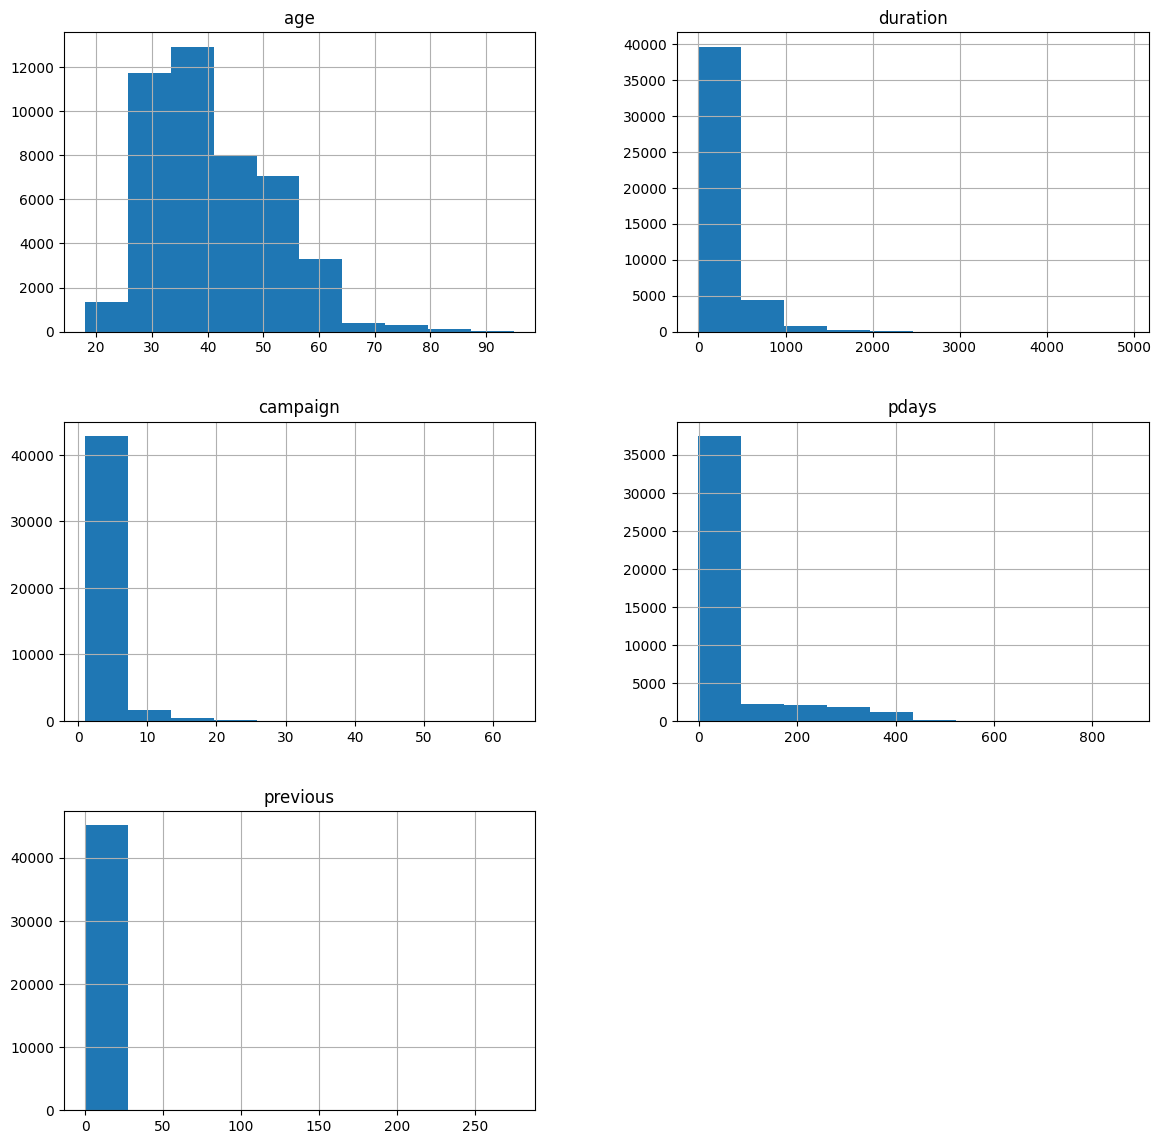

In [ ]:
#creating histograms
bank[num_cols].hist(figsize=(14,14))
plt.show()

### Sumarizing Numerical Data

In [ ]:
#Checking summary statistics
bank[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### Sumarizing Categorical Data

In [ ]:
#Printing the % sub categories of each category
for i in cat_cols:
    print(bank[i].value_counts(normalize=True))
    print('*'*40)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64
****************************************
married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64
****************************************
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64
****************************************
no     0.981973
yes    0.018027
Name: default, dtype: float64
****************************************
yes    0.555838
no     0.444162
Name: housing, dtype: float64
****************************************
no     0.839774
yes    0.160226
Name: loan, dtype: float64
****************************************
cellular     0.64774

## Bivariate Analysis

### Average value of numerical variables by class of target variable

In [ ]:
#Mean of numerical varibles grouped by attrition
bank.groupby(['y'])[num_cols].mean()

,age,duration,campaign,pdays,previous
y,,,,,
no,40.838986,221.182806,2.846350,36.421372,0.502154
yes,41.670070,537.294574,2.141047,68.702968,1.170354


### Looking at relative frequencies of categorical variables by class of target

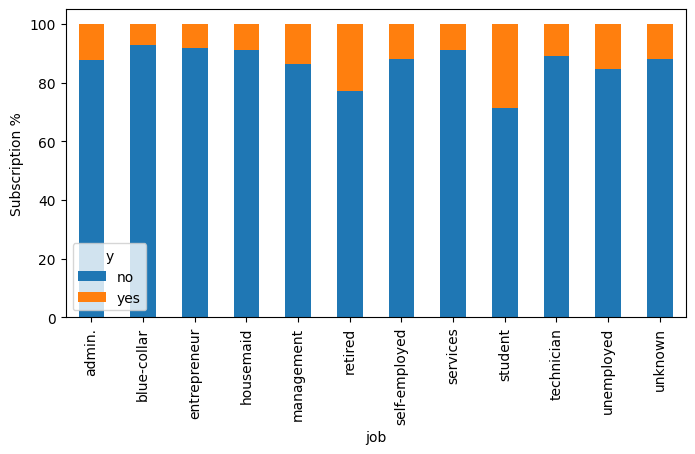

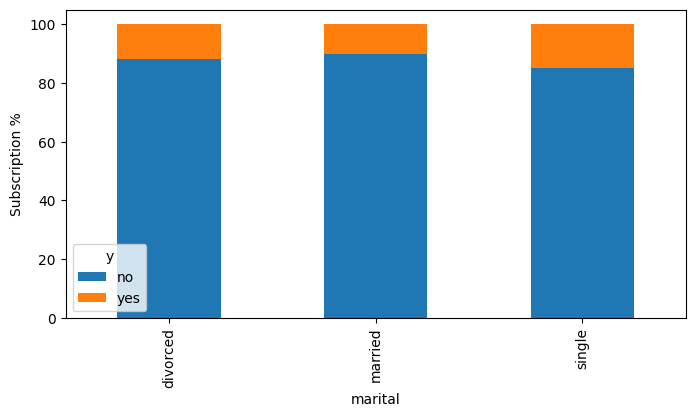

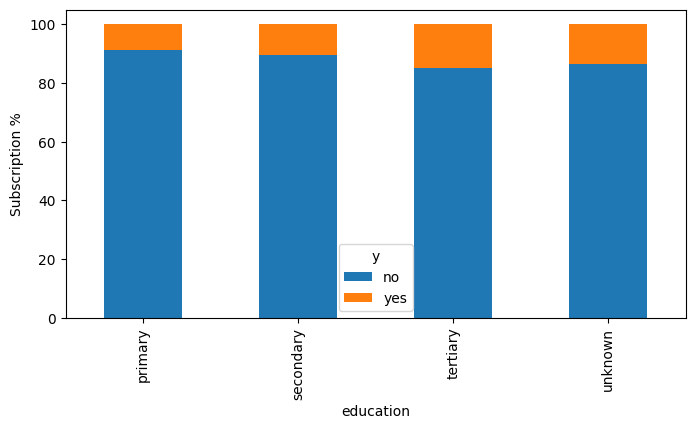

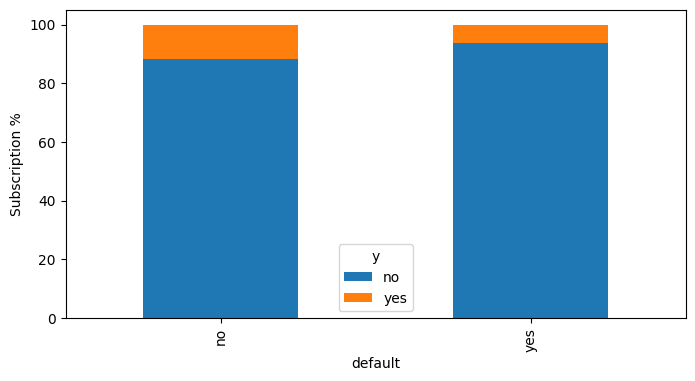

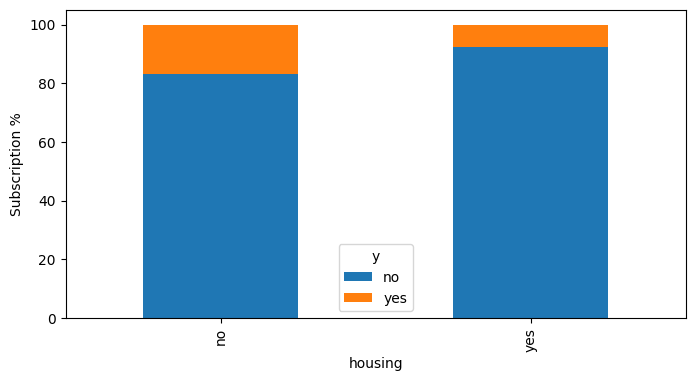

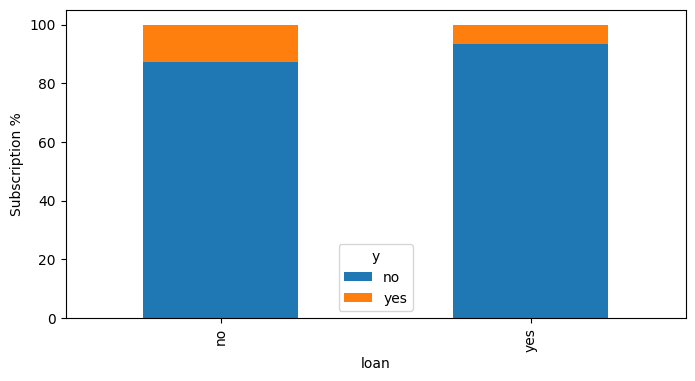

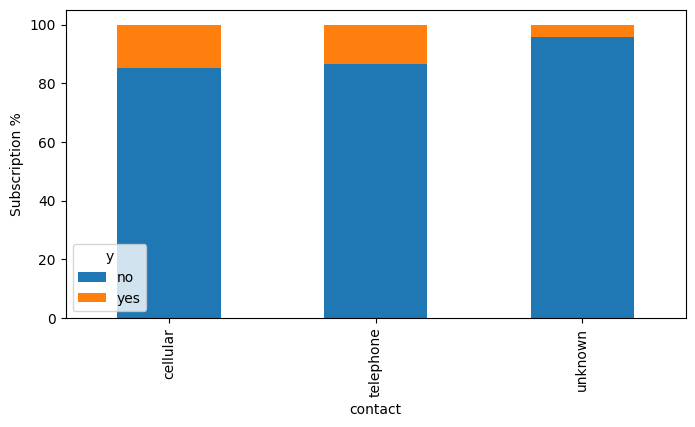

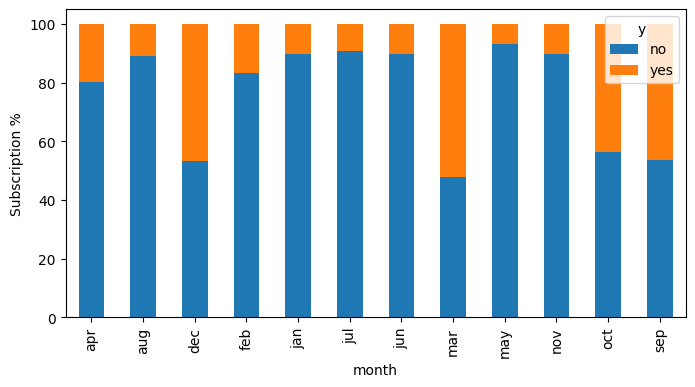

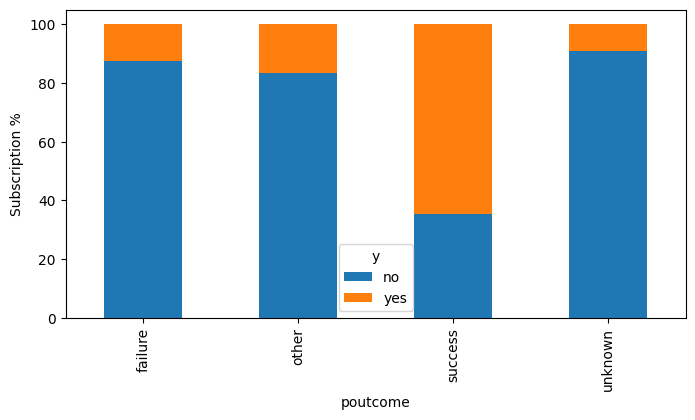

In [ ]:
for i in cat_cols:
    if i!='y':
        (pd.crosstab(bank[i],bank['y'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Subscription %')

### Creating dummy variables for the categorical variables.

Before doing so, check for the unique values in the column using the ```unique()``` method. The variables with only two values will be handled differently (note that this separation is not a requirement, merely conventional).

```data_frame['column'].unique()```

In [ ]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

### 8. Get dummies for ```'job', 'marital', 'education', 'contact', 'month', 'poutcome'```
Use the ```get_dummies()``` method for the variables with more than two categories. Reassign the bank data frame so that it has the newly transformed variables.
```
data_frame=pd.get_dummies(data=data_frame, columns=categorical_columns, drop_first=True)
```

In [ ]:
#creating list of dummy columns
cat_cols_dummies=['job', 'marital', 'education', 'contact', 'month', 'poutcome']

#creating dummy variables and reassigning the data frame
bank = pd.get_dummies(data = bank, columns= cat_cols_dummies, drop_first= True)
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


### 9. Convert ```yes', 'no'``` to ```0, 1```
For categorical variables with 'yes' or 'no' values, convert the 'yes' to 1 and the 'no' values to 0.

In [ ]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
bank['housing'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
bank['y'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
dict_default={'yes': 1, 'no':0}
dict_housing={'yes': 1, 'no':0}
dict_loan={'yes': 1, 'no':0}
dict_y={'yes': 1, 'no':0}

bank['default']=bank.default.map(dict_default)
bank['housing']=bank.housing.map(dict_housing)
bank['loan']=bank.loan.map(dict_loan)
bank['y']=bank.y.map(dict_y)


### 10. Examine the first few lines of the bank data *set*

In [ ]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_blue-collar      45211 non-null  uint8
 12  job_entrepreneur     45211 non-null  uint8
 13  job_housemaid        45211 non-null  uint8
 14  job_management       45211 non-null  uint8
 15  job_retired          45211 non-null  uint8
 16  job_self-employed    4

### 11. Separate the feature variables from the target variable.

In [ ]:
#Separating target variable and other variables
y= bank['y']
X= bank.drop(columns = ['y'])

### Scaling the data

The independent variables in this dataset have different scales. When features have differing scales from each other, there is a chance that a higher weightage will be given to features which have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

In this problem, we will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

The standard score of a sample x is calculated as:

**z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

### 12. Run the standard scalar to transform the values in the collection of feature values.
```
#Scaling the data
sc=StandardScaler() # imported with the libraries, we give it an alias here

X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)
```

In [ ]:
#Scaling the data
sc=StandardScaler() # imported with the libraries, we give it an alias here
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

*** This ends our preprocessing tasks for now ***
The next step would be splitting the training and testing sets and then running the model (s).